In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

In [2]:
# download from https://evictionlab.org/get-the-data/
# Choose VA => choose "all.csv" (Change the file name to 'VA.csv')
# Choose VA => choose "cities.csv" (Change the file name to 'cities_VA.csv')
df = pd.read_csv('block-groups_VA.csv')

In [3]:
df_clean = df.dropna(axis=0, how='any')

In [4]:
df_clean = df_clean[df_clean['eviction-rate']<100]

In [5]:
HighRankCity = ['Richmond city, Virginia', 'Hampton city, Virginia', 'Newport News city, Virginia', 'Norfolk city, Virginia', 'Chesapeake city, Virginia']

In [6]:
df_clean.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed'],
      dtype='object')

In [7]:
# df_city=df_clean[(df_clean['name']==HighRankCity[0]) | (df_clean['name']==HighRankCity[1]) | (df_clean['name']==HighRankCity[2]) | (df_clean['name']==HighRankCity[3]) | (df_clean['name']==HighRankCity[4])]

In [8]:
df_city=df_clean[df_clean['parent-location']==HighRankCity[3]]   # Analyze 'Richmond city, Virginia' first

df_city.shape


(2296, 26)

In [9]:
df_city_2016=df_clean[(df_clean['parent-location']==HighRankCity[3]) & (df_clean['year']==2016)]

df_city_2016.shape

(164, 26)

In [10]:
df_city_2016

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-nh-pi,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,imputed,subbed
84569,517100001001,2016,1.1,"Norfolk city, Virginia",991.0,4.15,53.55,1151.0,64432.0,251800.0,...,0.00,0.00,0.00,258.0,44.0,25.0,9.69,17.05,0,0
84570,517100001002,2016,1.2,"Norfolk city, Virginia",1355.0,11.07,71.21,934.0,49161.0,219200.0,...,0.00,1.18,1.48,458.0,96.0,49.0,10.70,20.96,0,0
84571,517100002011,2016,2.01.1,"Norfolk city, Virginia",1627.0,20.94,79.66,993.0,34136.0,254700.0,...,0.00,5.59,0.00,490.0,162.0,58.0,11.84,33.06,0,0
84572,517100002012,2016,2.01.2,"Norfolk city, Virginia",1063.0,11.47,62.06,821.0,41131.0,177400.0,...,0.00,5.27,0.00,450.0,120.0,47.0,10.44,26.67,0,0
84573,517100002021,2016,2.02.1,"Norfolk city, Virginia",812.0,9.86,37.86,859.0,54167.0,204900.0,...,0.00,3.69,0.00,141.0,34.0,4.0,2.84,24.11,0,0
84574,517100002022,2016,2.02.2,"Norfolk city, Virginia",1124.0,25.42,40.16,1151.0,31674.0,154000.0,...,0.00,0.53,0.00,217.0,154.0,44.0,20.28,70.97,0,0
84575,517100002023,2016,2.02.3,"Norfolk city, Virginia",1223.0,19.76,65.82,1135.0,53611.0,159500.0,...,24.53,3.52,0.00,171.0,40.0,10.0,5.85,23.39,0,0
84576,517100002024,2016,2.02.4,"Norfolk city, Virginia",842.0,15.00,53.09,1077.0,45795.0,164600.0,...,0.00,10.33,0.00,178.0,22.0,7.0,3.93,12.36,0,0
84577,517100003001,2016,3.1,"Norfolk city, Virginia",1067.0,9.19,44.63,853.0,53750.0,296300.0,...,0.00,6.56,0.00,337.0,127.0,26.0,7.72,37.69,0,0
84578,517100003002,2016,3.2,"Norfolk city, Virginia",751.0,32.56,78.93,735.0,25216.0,188300.0,...,0.00,0.00,0.00,311.0,121.0,33.0,10.61,38.91,0,0


# Analyze Norfolk city, Virginia in 2016

In [11]:
X = df_city_2016.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate'],axis=1)
y = df_city_2016['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

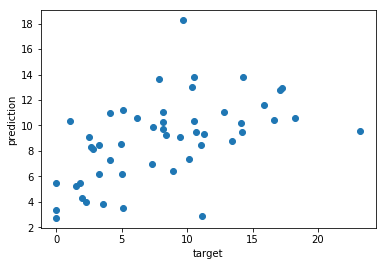

In [12]:
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

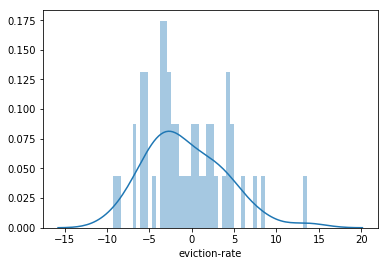

In [13]:
sns.distplot((y_test-predictions),bins=50);

In [14]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.8970851639
Test set score: 0.2712997172
MAE: 3.82591
MSE: 21.6308098782
RMSE: 4.65089344946


Feature ranking:
1. feature 5 (median-property-value) (0.154079)
2. feature 4 (median-household-income) (0.119087)
3. feature 8 (pct-af-am) (0.117240)
4. feature 6 (rent-burden) (0.107864)
5. feature 7 (pct-white) (0.100486)
6. feature 13 (pct-multiple) (0.087850)
7. feature 3 (median-gross-rent) (0.051483)
8. feature 15 (renter-occupied-households) (0.051208)
9. feature 1 (poverty-rate) (0.044932)
10. feature 0 (population) (0.042089)
11. feature 2 (pct-renter-occupied) (0.040382)
12. feature 11 (pct-asian) (0.034375)
13. feature 9 (pct-hispanic) (0.031739)
14. feature 10 (pct-am-ind) (0.008605)
15. feature 14 (pct-other) (0.007356)
16. feature 12 (pct-nh-pi) (0.001225)


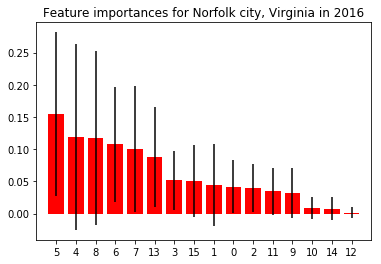

In [15]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Norfolk city, Virginia in 2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [16]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_NorfolkCity_2016_rf_all.csv')

In [17]:
# do a quick baseline test
baseline = LinearRegression()
single_tree = DecisionTreeRegressor()
print("CV single tree:", cross_val_score(single_tree, X_train, y_train).mean())
print("CV baseline:", cross_val_score(baseline,X_train, y_train).mean())
print("CV forest:", cross_val_score(rfc, X_train, y_train).mean())

CV single tree: -0.45538964292
CV baseline: -12.6012457516
CV forest: 0.221039822624


In [18]:
# test score
single_tree.fit(X_train, y_train)
baseline.fit(X_train, y_train)
print("test score single tree:", single_tree.score(X_test, y_test))
print("test score baseline:", baseline.score(X_test, y_test))
print("test score forest:", rfc.score(X_test, y_test))

test score single tree: -0.343630833709
test score baseline: 0.220296758171
test score forest: 0.271299717212


# Use pct-af-am race only

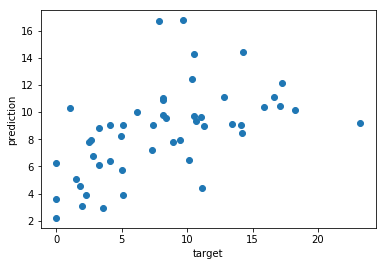

In [19]:
X = df_city_2016.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-white','population','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_city_2016['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [20]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.8925070187
Test set score: 0.2826227543
MAE: 3.739944
MSE: 21.294695748
RMSE: 4.61461761666


Feature ranking:
1. feature 4 (median-property-value) (0.220520)
2. feature 6 (pct-af-am) (0.189011)
3. feature 3 (median-household-income) (0.188441)
4. feature 5 (rent-burden) (0.142152)
5. feature 2 (median-gross-rent) (0.107876)
6. feature 1 (pct-renter-occupied) (0.078456)
7. feature 0 (poverty-rate) (0.073543)


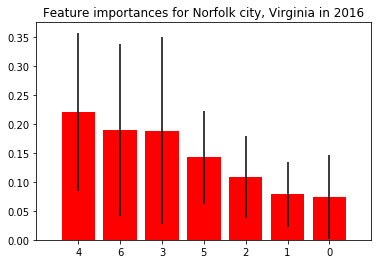

In [21]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Norfolk city, Virginia in 2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [22]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_NorfolkCity_2016_rf_pct-af-am.csv')

# Analyze Norfolk city, Virginia all 2000-2016 years

In [23]:
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

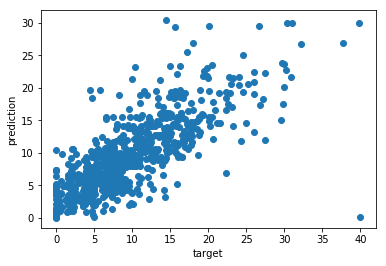

In [24]:
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [25]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.9218950825
Test set score: 0.5818398670
MAE: 3.17175724161
MSE: 19.6022072811
RMSE: 4.42743800421


Feature ranking:
1. feature 8 (pct-af-am) (0.185401)
2. feature 15 (renter-occupied-households) (0.162470)
3. feature 4 (median-household-income) (0.118259)
4. feature 3 (median-gross-rent) (0.101534)
5. feature 5 (median-property-value) (0.061161)
6. feature 7 (pct-white) (0.054243)
7. feature 2 (pct-renter-occupied) (0.051793)
8. feature 13 (pct-multiple) (0.046601)
9. feature 9 (pct-hispanic) (0.045168)
10. feature 6 (rent-burden) (0.038952)
11. feature 0 (population) (0.037083)
12. feature 1 (poverty-rate) (0.036007)
13. feature 11 (pct-asian) (0.023655)
14. feature 10 (pct-am-ind) (0.016985)
15. feature 14 (pct-other) (0.011389)
16. feature 12 (pct-nh-pi) (0.009297)


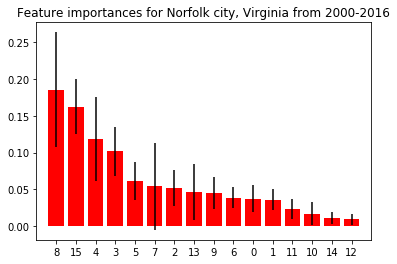

In [26]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Norfolk city, Virginia from 2000-2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [27]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_NorfolkCity_years_all.csv')

# Use pct-af-am race only

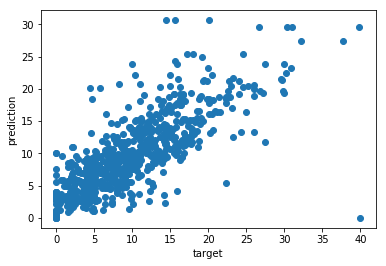

In [28]:
# Use pct-af-am race only
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-white','population','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [29]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.7807675132
Test set score: 0.5878304764
MAE: 3.14596088287
MSE: 19.3213838409
RMSE: 4.3956096097


Feature ranking:
1. feature 6 (pct-af-am) (0.308587)
2. feature 3 (median-household-income) (0.170027)
3. feature 2 (median-gross-rent) (0.147673)
4. feature 4 (median-property-value) (0.115503)
5. feature 1 (pct-renter-occupied) (0.104365)
6. feature 5 (rent-burden) (0.078065)
7. feature 0 (poverty-rate) (0.075780)


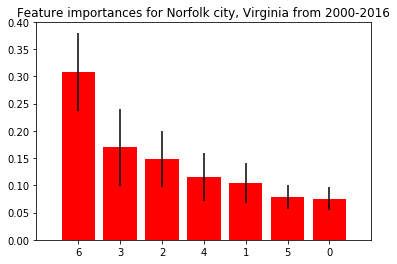

In [30]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Norfolk city, Virginia from 2000-2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [31]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_NorfolkCity_years_rf_pct-af-am.csv')

In [32]:
# do a quick baseline test
baseline = LinearRegression()
single_tree = DecisionTreeRegressor()
print("CV single tree:", cross_val_score(single_tree, X_train, y_train).mean())
print("CV baseline:", cross_val_score(baseline,X_train, y_train).mean())
print("CV forest:", cross_val_score(rfc, X_train, y_train).mean())

CV single tree: 0.396803004059
CV baseline: 0.21486941058
CV forest: 0.505059186408


In [33]:
# test score
single_tree.fit(X_train, y_train)
baseline.fit(X_train, y_train)
print("test score single tree:", single_tree.score(X_test, y_test))
print("test score baseline:", baseline.score(X_test, y_test))
print("test score forest:", rfc.score(X_test, y_test))

test score single tree: 0.509272736957
test score baseline: 0.218492621686
test score forest: 0.587830476419


# Use pct-white only

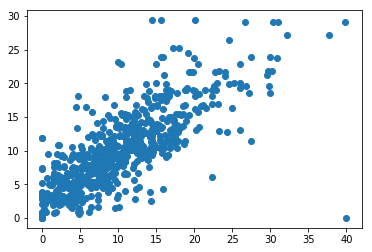

In [34]:
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-af-am','population','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)

In [35]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.7825751017
Test set score: 0.6004456052
MAE: 3.09806442808
MSE: 18.7300209894
RMSE: 4.32781942661


# Use both pct-white and pct-af-am

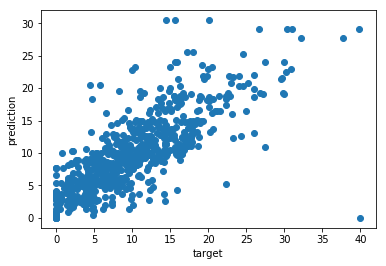

In [36]:
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','population','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [37]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.7821641304
Test set score: 0.5923974553
MAE: 3.11737850279
MSE: 19.1072963176
RMSE: 4.37118934817


Feature ranking:
1. feature 7 (pct-af-am) (0.269828)
2. feature 3 (median-household-income) (0.156381)
3. feature 2 (median-gross-rent) (0.151059)
4. feature 4 (median-property-value) (0.103114)
5. feature 1 (pct-renter-occupied) (0.092273)
6. feature 6 (pct-white) (0.085867)
7. feature 0 (poverty-rate) (0.072124)
8. feature 5 (rent-burden) (0.069353)


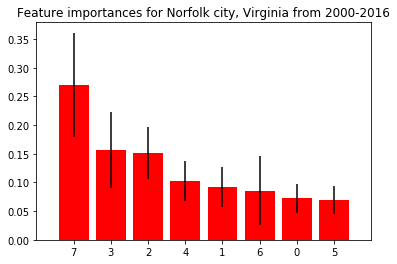

In [38]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Norfolk city, Virginia from 2000-2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# use pct-hispanic only

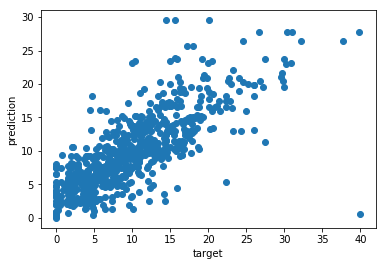

In [39]:
# Use pct-af-am race only
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-white','pct-af-am','population','pct-multiple','pct-asian'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [40]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.7810883937
Test set score: 0.5952922615
MAE: 3.15040270846
MSE: 18.9715956953
RMSE: 4.35563952771


In [41]:
# do a quick baseline test
baseline = LinearRegression()
single_tree = DecisionTreeRegressor()
print("CV single tree:", cross_val_score(single_tree, X_train, y_train).mean())
print("CV baseline:", cross_val_score(baseline,X_train, y_train).mean())
print("CV forest:", cross_val_score(rfc, X_train, y_train).mean())

CV single tree: 0.383544494811
CV baseline: 0.164779620261
CV forest: 0.493614667185


Feature ranking:
1. feature 3 (median-household-income) (0.281409)
2. feature 2 (median-gross-rent) (0.174399)
3. feature 4 (median-property-value) (0.165734)
4. feature 1 (pct-renter-occupied) (0.128329)
5. feature 0 (poverty-rate) (0.094721)
6. feature 5 (rent-burden) (0.078118)
7. feature 6 (pct-hispanic) (0.077290)


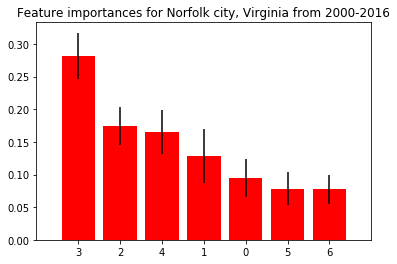

In [42]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Norfolk city, Virginia from 2000-2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [43]:
by_year = df_city.groupby('year')

by_year.mean()

,GEOID,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,...,pct-nh-pi,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,imputed,subbed
year,,,,,,,,,,,,,,,,,,,,,
2000,5.171002e+11,1252.963065,18.193817,52.448656,561.269892,33756.643387,98142.098387,27.659839,47.843495,43.005215,...,0.087634,2.016559,0.192849,252.516129,65.795699,34.790323,12.647097,23.381129,0.0,0.0
2001,5.171002e+11,1239.660266,18.000266,52.688564,555.298936,33397.530160,97098.033511,27.365585,47.467500,43.212606,...,0.086702,2.261064,0.190798,250.021277,59.856383,32.643617,12.653032,22.009947,0.0,0.0
2002,5.171002e+11,1246.268075,18.096524,52.702941,558.268449,33576.126578,97617.274332,27.511925,47.587647,43.310000,...,0.087166,2.005775,0.191818,251.465241,67.657754,27.342246,10.473529,25.393529,0.0,0.0
2003,5.171002e+11,1239.660266,18.000266,52.688564,555.298936,33397.530160,97098.033511,27.365585,47.467500,43.212606,...,0.086702,2.261064,0.190798,250.319149,58.744681,24.276596,9.016436,21.715372,0.0,0.0
2004,5.171002e+11,1239.660266,18.000266,52.688564,555.298936,33397.530160,97098.033511,27.365585,47.467500,43.212606,...,0.086702,2.261064,0.190798,250.372340,90.457447,28.101064,10.680585,32.230904,0.0,0.0
2005,5.171002e+11,1253.837914,3.377005,49.862888,799.529465,44328.207219,207935.766524,31.805455,45.718021,42.931765,...,0.171497,2.060107,0.240107,252.016043,87.839572,25.181818,9.775829,32.008610,0.0,0.0
2006,5.171002e+11,1247.170426,3.359043,50.129574,795.283830,44092.665160,206829.725213,31.636543,45.826383,42.783298,...,0.170585,2.071968,0.238830,250.734043,92.872340,24.787234,9.087766,32.491596,0.0,0.0
2011,5.171000e+11,1257.000000,15.048598,51.220549,1075.530488,49135.018293,215441.457317,35.226829,45.272012,40.215061,...,0.177012,3.413049,0.265305,252.250000,91.719512,23.621951,8.909451,32.117866,0.0,0.0
2012,5.171000e+11,1257.000000,15.048598,51.220549,1075.530488,49135.018293,215441.457317,35.226829,45.272012,40.215061,...,0.177012,3.413049,0.265305,254.634146,83.493902,21.542683,8.115610,30.142683,0.0,0.0


In [44]:
year1= np.array(range(2000,2007))
year2= np.array(range(2011,2017))
years = np.concatenate((year1, year2), axis=0)

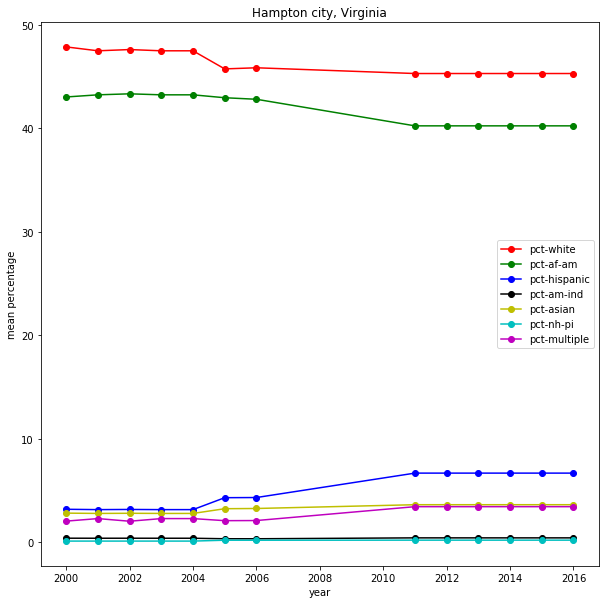

In [45]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax.plot(years,by_year.mean()['pct-white'].as_matrix(),'-ro',label = 'pct-white')
ax.plot(years,by_year.mean()['pct-af-am'].as_matrix(),'-go',label = 'pct-af-am')
ax.plot(years,by_year.mean()['pct-hispanic'].as_matrix(),'-bo',label = 'pct-hispanic')
ax.plot(years,by_year.mean()['pct-am-ind'].as_matrix(),'-ko',label = 'pct-am-ind')
ax.plot(years,by_year.mean()['pct-asian'].as_matrix(),'-yo',label = 'pct-asian')
ax.plot(years,by_year.mean()['pct-nh-pi'].as_matrix(),'-co',label = 'pct-nh-pi')
ax.plot(years,by_year.mean()['pct-multiple'].as_matrix(),'-mo',label = 'pct-multiple')
plt.legend(fontsize="xx-large")
plt.title('Hampton city, Virginia')
plt.xlabel("year")
plt.ylabel("mean percentage")
ax.legend()
plt.show()
fig.savefig('Fig_VA_NorfolkCity_races.jpg')

Text(0,0.5,'mean eviction-rate')

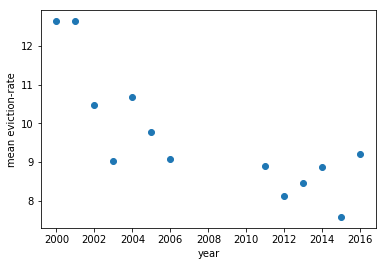

In [46]:
plt.scatter(years,by_year.mean()['eviction-rate'].as_matrix())
plt.xlabel("year")
plt.ylabel('mean eviction-rate')


In [47]:
by_year.mean().columns

Index(['GEOID', 'population', 'poverty-rate', 'pct-renter-occupied',
       'median-gross-rent', 'median-household-income', 'median-property-value',
       'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
       'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'renter-occupied-households', 'eviction-filings', 'evictions',
       'eviction-rate', 'eviction-filing-rate', 'imputed', 'subbed'],
      dtype='object')

Text(0,0.5,'mean rent-burden')

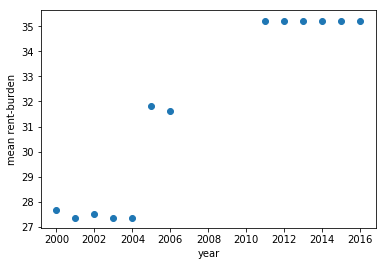

In [48]:
plt.scatter(years,by_year.mean()['rent-burden'].as_matrix())
plt.xlabel("year")
plt.ylabel('mean rent-burden')

Text(0,0.5,'mean median-household-income')

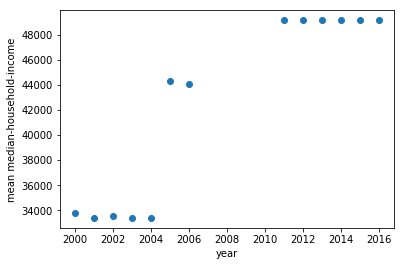

In [49]:
plt.scatter(years,by_year.mean()['median-household-income'].as_matrix())
plt.xlabel("year")
plt.ylabel('mean median-household-income')

Text(0,0.5,'population')

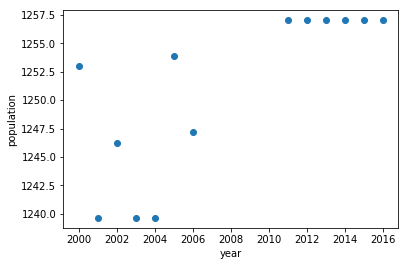

In [50]:
plt.scatter(years,by_year.mean()['population'].as_matrix())
plt.xlabel("year")
plt.ylabel('population')

Text(0,0.5,'poverty-rate')

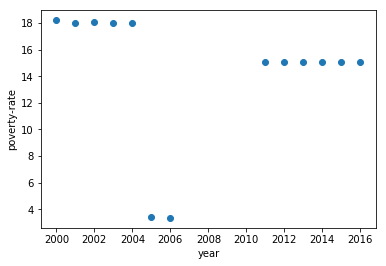

In [51]:
plt.scatter(years,by_year.mean()['poverty-rate'].as_matrix())
plt.xlabel("year")
plt.ylabel('poverty-rate')

Text(0,0.5,'pct-renter-occupied')

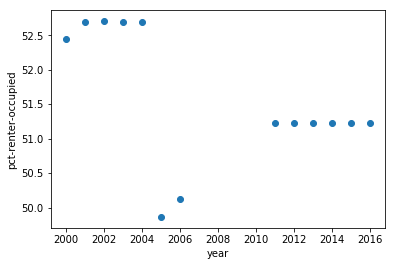

In [52]:
plt.scatter(years,by_year.mean()['pct-renter-occupied'].as_matrix())
plt.xlabel("year")
plt.ylabel('pct-renter-occupied')

Text(0,0.5,'median-gross-rent')

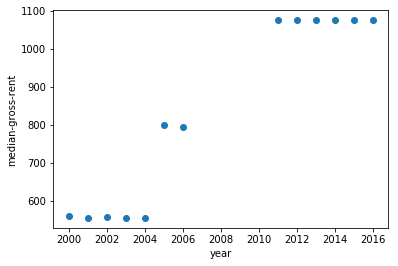

In [53]:
plt.scatter(years,by_year.mean()['median-gross-rent'].as_matrix())
plt.xlabel("year")
plt.ylabel('median-gross-rent')

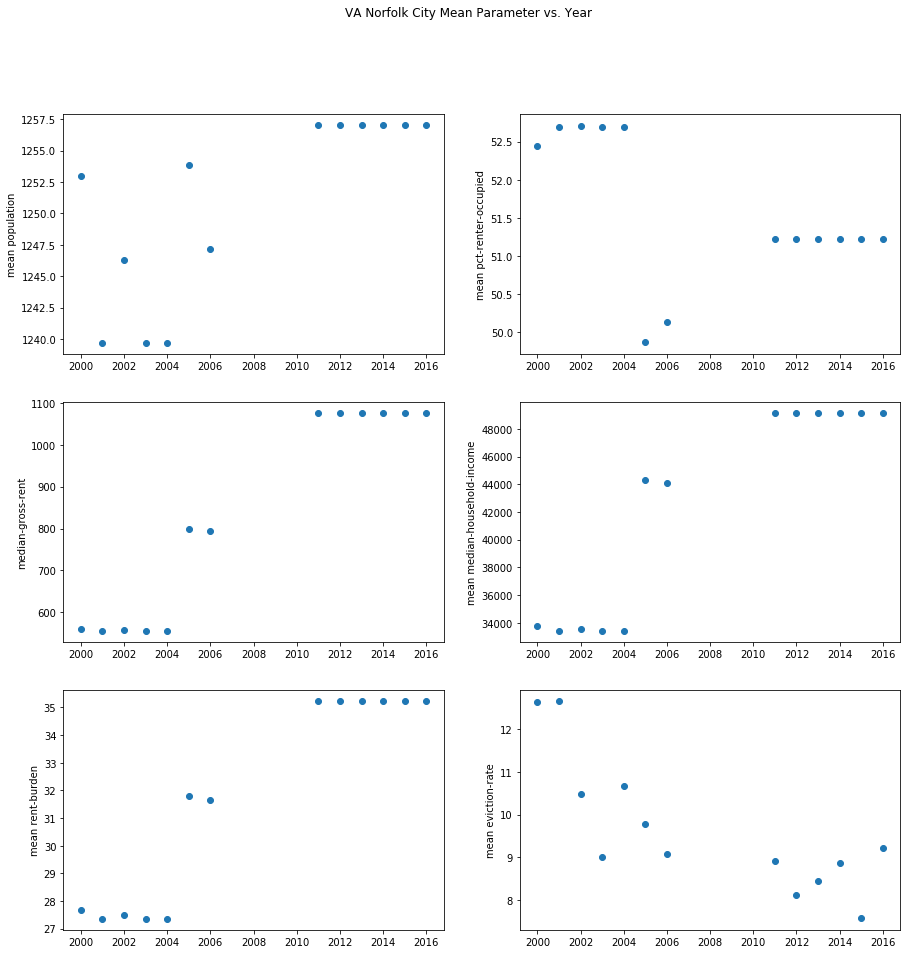

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15))

fig.suptitle('VA Norfolk City Mean Parameter vs. Year')

ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

ax0.scatter(years,by_year.mean()['population'].as_matrix())
ax0.set_ylabel('mean population')

ax1.scatter(years,by_year.mean()['pct-renter-occupied'].as_matrix())
ax1.set_ylabel('mean pct-renter-occupied')

ax2.scatter(years,by_year.mean()['median-gross-rent'].as_matrix())
ax2.set_ylabel('median-gross-rent')

ax3.scatter(years,by_year.mean()['median-household-income'].as_matrix())
ax3.set_ylabel('mean median-household-income')

ax4.scatter(years,by_year.mean()['rent-burden'].as_matrix())
ax4.set_ylabel('mean rent-burden')

ax5.scatter(years,by_year.mean()['eviction-rate'].as_matrix())
ax5.set_ylabel('mean eviction-rate')

fig.savefig('Fig_VA_NorfolkCity_YearMean.jpg')